In [1]:
#Import Dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
#Read in CSV Spreadsheets
hawaii_measurements = pd.read_csv("resources/clean_hawaii_measurements.csv")
hawaii_stations = pd.read_csv("resources/clean_hawaii_stations.csv")

In [3]:
#Remove the extra index column(s)
hawaii_measurements = hawaii_measurements.rename(columns={"Unnamed: 0":"index"}).set_index('index')
hawaii_stations = hawaii_stations.rename(columns={"Unnamed: 0":"index"}).set_index('index')

In [4]:
measurements_dates = hawaii_measurements['date']
measurements_dates[0]

'2010-01-01'

In [5]:
# View the dataframes
print(hawaii_measurements.head())
print(hawaii_stations.head())

           station        date  prcp  tobs
index                                     
0      USC00519397  2010-01-01  0.08    65
1      USC00519397  2010-01-02  0.00    63
2      USC00519397  2010-01-03  0.00    74
3      USC00519397  2010-01-04  0.00    76
5      USC00519397  2010-01-07  0.06    70
           station                                    name  latitude  \
index                                                                  
0      USC00519397                    WAIKIKI 717.2, HI US   21.2716   
1      USC00513117                    KANEOHE 838.1, HI US   21.4234   
2      USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US   21.5213   
3      USC00517948                       PEARL CITY, HI US   21.3934   
4      USC00518838              UPPER WAHIAWA 874.3, HI US   21.4992   

       longitude  elevation  
index                        
0      -157.8168        3.0  
1      -157.8015       14.6  
2      -157.8374        7.0  
3      -157.9751       11.9  
4      -158.01

In [6]:
# Connect to the SQL Engine
engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

In [7]:
#Debug statement to clear the dataframes so I don't get errors when trying to run this script several times:
engine.execute("DELETE FROM hawaii_measurements;")
engine.execute("DELETE FROM hawaii_stations;")

In [8]:
#Push the dataframes to the database: 
hawaii_measurements.to_sql(name="hawaii_measurements", con=conn, if_exists='append')
hawaii_stations.to_sql(name="hawaii_stations", con=conn, if_exists='append')

In [9]:
#Map the Classes from the database and pull out the keys:
Base = automap_base()
Base.prepare(engine, reflect=True)

In [10]:
Base.classes.keys()

['hawaii_measurements', 'hawaii_stations']

In [11]:
#Save the classes as objects to be used in the script:
Measurements = Base.classes.hawaii_measurements
Station = Base.classes.hawaii_stations

In [12]:
#Create the Session object:
session = Session(engine)

In [13]:
# Query the database for the chosen dates (12 months from the end of the database) and create add each row to a list:
data = session.query(Measurements.date, Measurements.prcp).filter(Measurements.date >= '2016-08-23').order_by(Measurements.date)
data_list = []
for row in data:
    data_list.append(row)

In [14]:
# Use the list of rows to create a dataframe for the dates and preciptation value: 
date_prcp = pd.DataFrame(data= data_list)
date_prcp = date_prcp.sort_values("date", ascending=True)
date_prcp = date_prcp.set_index("date")
date_prcp.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


In [15]:
#XTICK ATTEMPT WITH PLT.SUBPLOT
#x = date_prcp.index.tolist()
#y = date_prcp['prcp'].tolist()
#ax = plt.subplot(111)
#ax.bar(x, y)
#ax.xaxis_date()
#plt.show()

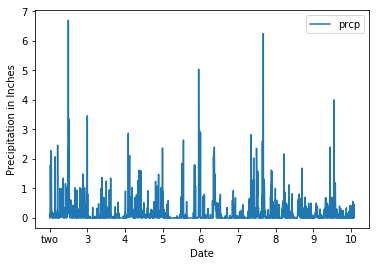

Text(0,0,'two')
Text(250,0,'3')
Text(500,0,'4')
Text(750,0,'5')
Text(1000,0,'6')
Text(1250,0,'7')
Text(1500,0,'8')
Text(1750,0,'9')
Text(2000,0,'10')


In [42]:
# Plot the precipitation vs dates:
plt.figure(figsize=(5,3))
date_prcp.plot()
plt.xlabel("Date")
plt.ylabel("Precipitation in Inches")
locs, labels = plt.xticks([0,  250,  500,  750, 1000, 1250, 1500, 1750, 2000] , ["two", "3", "4", "5", "6", "7", "8","9","10",])
plt.show()
for label in labels:
    print(label)

In [17]:
# Read in the hawaii_measurements database and set it to a dataframe: 
measurements_df = pd.read_sql('SELECT * FROM hawaii_measurements', con=conn)
measurements_df.head()

,index,station,date,prcp,tobs
0,0,USC00519397,2010-01-01,0.08,65
1,1,USC00519397,2010-01-02,0.00,63
2,2,USC00519397,2010-01-03,0.00,74
3,3,USC00519397,2010-01-04,0.00,76
4,5,USC00519397,2010-01-07,0.06,70


In [18]:
#Count the number of stations:
number_of_stations = measurements_df['station'].nunique()
print(f"The number of stations is: {number_of_stations}")

The number of stations is: 9


In [19]:
#Find the number of stations' observations and the most station with the most observations:
print(measurements_df['station'].value_counts())
most_observed_station = measurements_df['station'].value_counts().index[0]
observations = measurements_df['station'].value_counts()[0]
print(f"The station with the most observations is stations number: {most_observed_station} with {observations} observations.")

USC00519281    2772
USC00513117    2696
USC00519397    2685
USC00519523    2572
USC00516128    2484
USC00514830    1937
USC00511918    1932
USC00517948     683
USC00518838     342
Name: station, dtype: int64
The station with the most observations is stations number: USC00519281 with 2772 observations.


In [20]:
#Create a dataframe with only the last 12 months of data:
last12months_df = pd.read_sql("SELECT * FROM hawaii_measurements WHERE date >= '2016-08-23'", con=conn)
last12months_df.head()

,index,station,date,prcp,tobs
0,2363,USC00519397,2016-08-23,0.00,81
1,2364,USC00519397,2016-08-24,0.08,79
2,2365,USC00519397,2016-08-25,0.08,80
3,2366,USC00519397,2016-08-26,0.00,79
4,2367,USC00519397,2016-08-27,0.00,77


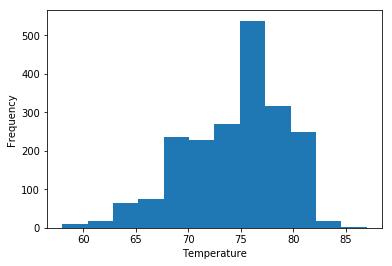

In [21]:
# Create a graph of the frequency of each temperature:
plt.hist(last12months_df['tobs'], 12)
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")
plt.show()

In [22]:
#Create a function that finds the min, max, and mean temps for a given date range and make a graph:
def calc_temps (start_date, end_date):
    dataframe = pd.read_sql(f"SELECT * FROM hawaii_measurements WHERE (date >= '{start_date}' AND date <= '{end_date}')", con=conn)
    min_temp = dataframe['tobs'].min()
    max_temp = dataframe['tobs'].max()
    mean_temp = dataframe['tobs'].mean()
    
    print(f"The minimum temperature for your date range is: {min_temp}")
    print(f"The maximum temperature for your date range is: {max_temp}")
    print(f"The average temperature for your date range is: {mean_temp}")
    
    plt.figure(figsize=(2,5))
    plt.bar(1, max_temp, width=1, yerr=(max_temp - min_temp), color="salmon", alpha=.5)
    plt.ylabel("Temp (F)")
    plt.title("Trip Avg Temp")
    plt.show()

The minimum temperature for your date range is: 56
The maximum temperature for your date range is: 87
The average temperature for your date range is: 72.50074794315633


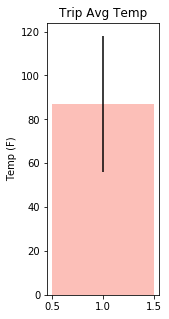

In [23]:
#Test the function:
calc_temps("2010-01-01", "2010-12-30")